Section 9: 45
Evaluation des performances

Jusqu'à présent, lorsqu'on a implémenté un modèle de machine learning, nous avons employer le pipline suivant:

.Chargement du dataset
.Création du modèle de prédiction
.Entraînement du modèle (Calcul des coefficients)
.Visualisation des performances
.Calcul de l'erreur(MSE)
.Prédiction de nouvelles valeurs

Comment savoir si les prédictions sont correctes?

La méthode la plus simple pour opérer est de diviser le dataset en 2:

Par exemple:
.80% des données pour Entraînement
.20% pour le test

Une fois les coeff optimaux calculés sur les données d'entraînement, ils peuvent paramétrer le modèle de prédiction pour tenter de prédire y sur le dataset test avec ses x.

Exemple sur Boston.csv contenant 506 lignes,
Nous pouvons le spliter en 
405 lignes d'entraînement et 101 pour le test.

Nous allons ensuite calculer notre erreur quadratique moyenne (MSE) sur le dataset d'entraînement et sur le dataset de test.

Si elle est basse sur nos 2 datasets => modèle fiable

Si basse sur dataset d'entraînement mais haute sur test => modèle n'arrive pas à généraliser sur des données qu'il n'a pas vu précédement.

(problème)

les erreurs:

Cepandant la mse ne permet pas de tirer des conclusions concrêtent par rapport à nos données.

Nous allons ici employer:

.rmse : la racine carrée de la mse

.R-squared (R²)

46: Racine carrée de l'erreur quadratique moyenne

Pour rappel, MSE = (1/N) * S (yi - pred_yi)² pour i allant de 1 à n
 
RMSE = sqrt(MSE)
La racine carrée permet d'avoir une erreur qui a la même unité que les données pour mieux comprendre la justesse de notre modèle.

Répond à la question, quell eerreur peut on espérer avoir sur nos prédictions?

Visuellement, cela peut s'exrimer par l'éloignement des points de données par rapport à la droite (lorsqu'il n'y a qu'un seul x).

47: R-squared: Coefficient de détermination

R² = 1- (Somme (yi-yi_pred)²)/(Somme(yi-y_mean)² )

R² a est tjrs inf ou égal à 1.

Pour qu'un modèle décrive la tendance de nos données, R² doit tendre vers 1.

Si proche de 0 mauvais modèle.




48 datset d'entraîement et de test

In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('iris/iris.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'iris/iris.csv'

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Estimons largeur des pétales en fonction de la longeur des pétales.

In [4]:
df.shape

(150, 5)

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Les données ed notre dataset sont regroupées par espèces, ce qui implique que si nous venions à sélectionner manuellement les données elles seraient biaisées.

Nous pouvons pour contrer cela , utiliser une fonction de randomisation comme suit.

1: Sélection des variables d'intérêt

In [6]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [7]:
X = df[['petal_length', 'petal_width']]
y = df['class']

Random split

In [8]:
from sklearn.model_selection import train_test_split

#Ici, 20% des données sont prélevées alléatoirement par variable avec test_size
#random_state est la seed de notre randomisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Données originelles', X.shape)
print('Traindataset', X_train.shape)
print('Test dataset', X_test.shape)

Données originelles (150, 2)
Traindataset (120, 2)
Test dataset (30, 2)


In [9]:
X_train.head()

,petal_length,petal_width
22,1.0,0.2
15,1.5,0.4
65,4.4,1.4
11,1.6,0.2
42,1.3,0.2


Sauvegarde des dataset (nous n'auront pas besoin des class ici)

In [10]:
X_train.to_csv('iris_train.csv')
X_test.to_csv('iris_test.csv')

49: Evaluation des performances

In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [12]:
os.chdir('iris')

In [13]:
os.getcwd()

'/home/t0r3l/CodingTime/Certifications/Udemy/Machine Learning/iris'

In [14]:

train = pd.read_csv("iris_train.csv")
test = pd.read_csv('iris_test.csv')

In [15]:
train

#Il existe une option pour éviter la création de la colonne Unnamed dans 
#train_test_split

,Unnamed: 0,petal_length,petal_width
0,22,1.0,0.2
1,15,1.5,0.4
2,65,4.4,1.4
3,11,1.6,0.2
4,42,1.3,0.2
...,...,...,...
115,71,4.0,1.3
116,106,4.5,1.7
117,14,1.2,0.2
118,92,4.0,1.2


In [16]:
x_train = train['petal_length'].values
y_train = train['petal_width'].values
x_test  = test['petal_length'].values
y_test = test['petal_width'].values

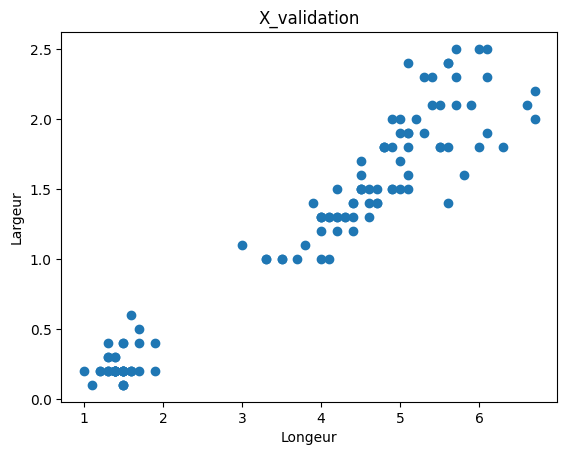

In [17]:
plt.plot(x_train, y_train, 'o')
plt.title('X_validation')
plt.xlabel('Longeur')
plt.ylabel('Largeur')
plt.show()

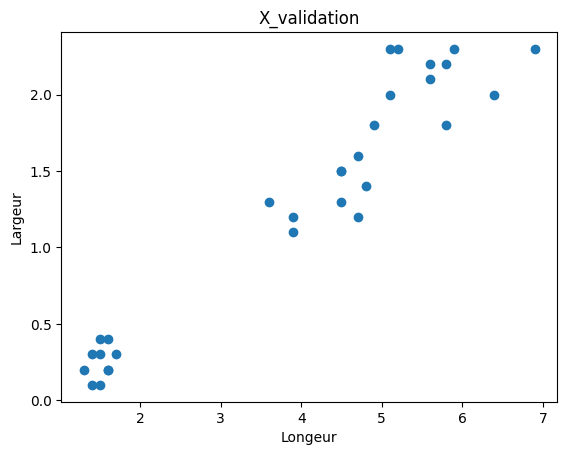

In [18]:
plt.plot(x_test, y_test, 'o')
plt.title('X_validation')
plt.xlabel('Longeur')
plt.ylabel('Largeur')
plt.show()

In [51]:
#Transformation des array en vecteur pour pouvoir employer sklearn 
#lin reg simple
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

modele = linear_model.LinearRegression()
modele.fit(x_train, y_train)

x_test = x_test.reshape(-1, 1)
y_test_pred = modele.predict(x_test)

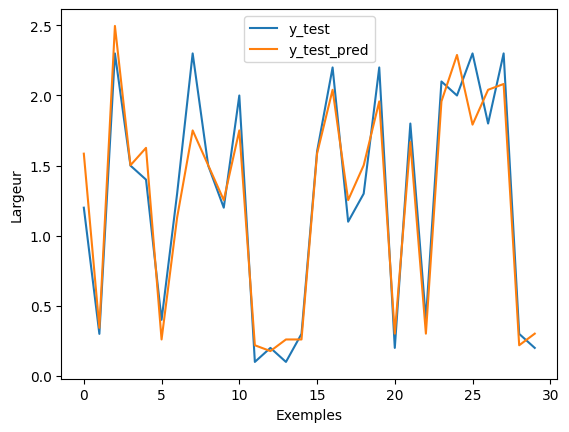

In [28]:
plt.plot(y_test, label = 'y_test')
plt.plot(y_test_pred, label = 'y_test_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend()

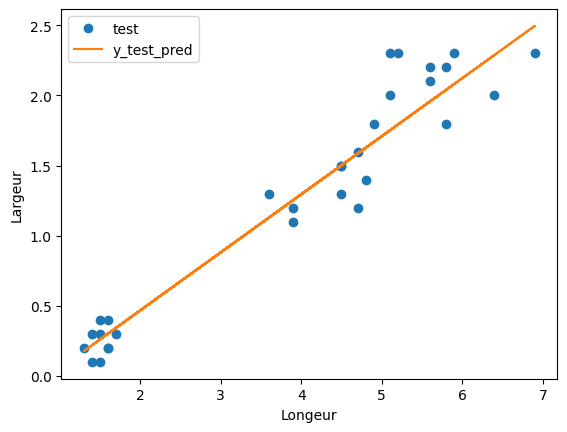

In [52]:
plt.plot(x_test, y_test, 'o', label = 'test')
plt.plot(x_test, y_test_pred, label = 'y_test_pred')
plt.xlabel('Longeur')
plt.ylabel('Largeur')
plt.legend()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score


#Erreurs sur données test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
#Erreur faible à l'échelle des données
print('smse : ', np.sqrt(mse_test))

#r² proche de 1 => modèle fiable
print('r² : ', r2_test)

smse :  0.21349051489171836
r² :  0.9282973309202085


In [57]:
y_train_pred = modele.predict(x_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
#Erreur très légèrement plus faible que sur les données de test
#(En générale les erreurs sont légèrement plus élevées sur les datasets de test)
print('smse : ', np.sqrt(mse_train))

#r² très légèrement plus faible que sur les données de test
print('r² : ', r2_train)



smse :  0.2037217659799251
r² :  0.9262758349586804
